# Extracting and Arranging Data

When analyzing a dataset, we may choose to look at _subsets_ of the data. Tidyverse (dplyr package within) has functions for extracting subsets of data by columns or rows and for arranging the output

![tidy_isolating.png](images/tidy_isolating.png)
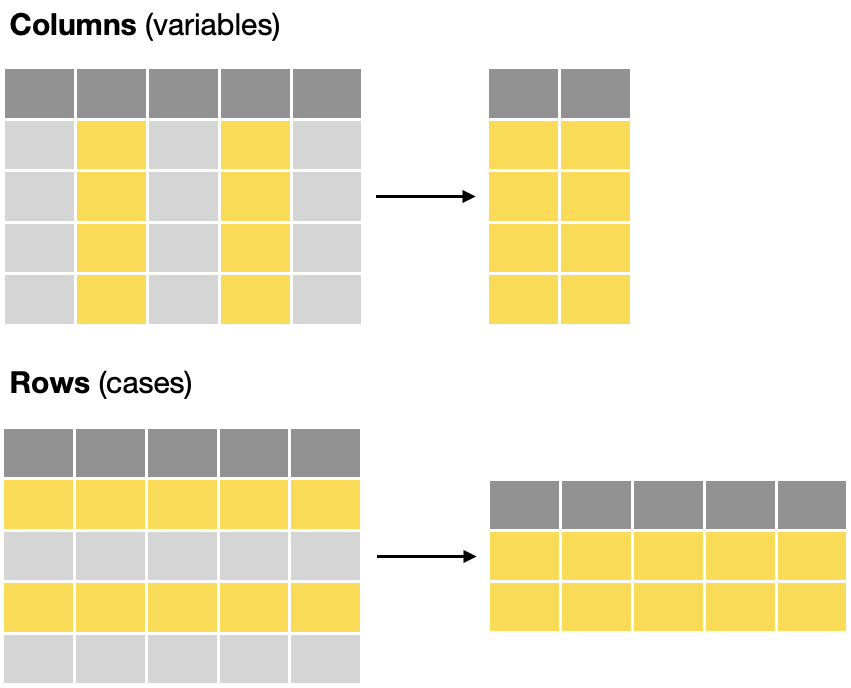

---
## Data preparation

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

# import data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

head(data)

---
## Choosing columns
- We use the ```select``` verb (function) to choose columns
  - `select(column1, column2, ..)`
- The selection can be specified by other helper functions
  - `starts_with()`
  - `ends_with()`
  - `contains()`

![tidy_select.png](images/tidy_select.png)
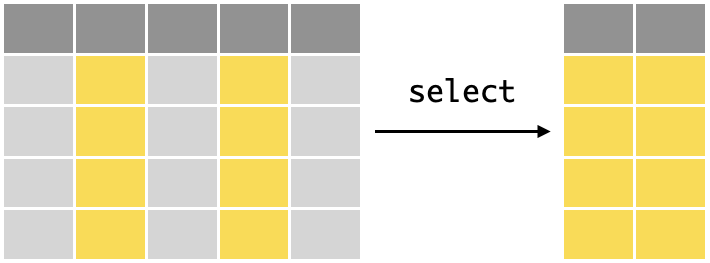

In [ ]:
# selecting age, male, diabetes, totChol columns

data %>% select(age, male, diabetes, totChol)

To exclude columns, we add the prefix `-` to the columns that we do not want selected

In [ ]:
# exclude education and heartRate columns

data %>% select(-education, -heartRate)

The function `select` can be used with **helper functions** that can match column names with a pattern
- ```starts_with()```: starts with prefix
- ```ends_with()```: ends with suffix
- ```contains()```: contains the string

In [ ]:
# including columns that contain "BP" in the name

data %>% select(age, male, contains("BP"))

If we want to **exclude** columns returned by the helper function, we use the ```!``` NOT boolean operator to negate the selection of the matched column(s)

In [ ]:
# exclude columns that contain "BP" in the name

data %>% select(age, male, !contains("BP"))

### Selecting one column as a vector

What if we want to choose *one* column and return it as a vector? This is useful if we want to pass the data to another function that accepts a vector

To do this, we use the ```pull``` verb (function)

![tidy_pull.png](images/tidy_pull.png)
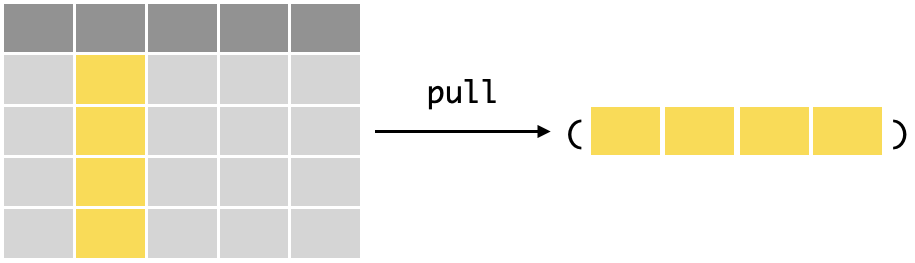

In [ ]:
# extract age column as a vector

data %>% pull(age)

We can pass the vector to functions that accept it as an input

In [ ]:
# pass vector of age data to functions

data %>% pull(age) %>% min()  # minimum
data %>% pull(age) %>% max()  # maximum
data %>% pull(age) %>% mean() # mean

---
## Choosing rows
- We can use the ```filter``` verb (function) to choose rows of data that fit our criteria
- Conditions can be chained using boolean operations (AND ```&```, OR ```|```)

![tidy_filter.png](images/tidy_filter.png)
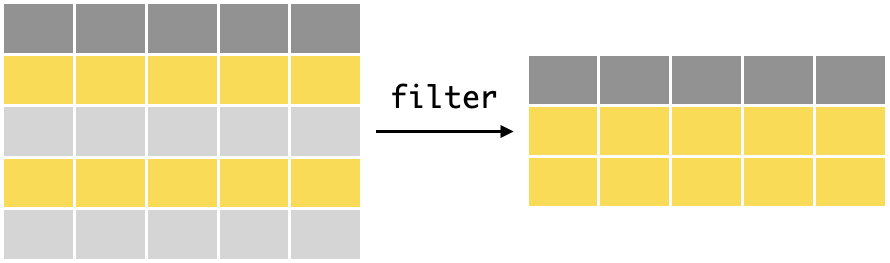

In [ ]:
# filter patients older than 65 and male

data %>% filter(age > 65 & male == 1)

We can also include functions that test a variable and return `TRUE/FALSE`
- The `is.na` function returns TRUE if variable contains an NA and is useful for identifying rows with missing values

In [ ]:
# filter rows with missing values in education

data %>% filter(is.na(education))

To find rows without missing values, we invert the results from the `is.na` function by prepending the function with a NOT boolean operator ```!```

In [ ]:
# filter rows that do NOT have missing values in education

data %>% filter(!is.na(education)) 

If we want to filter rows to match different **categories**, we can use the `%in%` operator with the `filter` function
- `filter(column_name %in% c(category1, category2,..))`

In [ ]:
# filtering rows with categories 1,3 in education column

data %>% filter(education %in% c(1,3))

### Dropping rows with missing values (NA)

Missing values are common in datasets and we can use the `drop_na` function to can drop the rows that contain missing values if we choose to
- If no arguments are specifed, ```drop_na``` will drop rows with missing values in **any** of the columns
- If we wish to be selective, we can specify which columns we want to check for missing values and drop these rows

We can see how many rows are dropped by first looking at the total number of rows in `data`

In [ ]:
# total number of rows

data %>% nrow() 

We can use the `drop_na` function to drop rows with missing values in **any** column, then check the number of remaining rows

In [ ]:
# dropping rows with missing values in any column

data %>% 
drop_na() %>%  
nrow()

We can also selectively drop rows with missing values in specific columns

In [ ]:
# dropping rows with missing values in glucose column

data %>% 
drop_na(glucose) %>% 
nrow()

In [ ]:
# dropping rows with missing values in glucose, BMI columns

data %>% 
drop_na(glucose, BMI) %>% 
nrow()

Note that the number of retained rows depends on which columns contain missing values (NA). 
- This may alter the the conclusions of your analysis
- We need to inspect the data to see if the rows with missing values are important to retain, or can be omitted from further analysis

We can inspect the rows that were dropped using ```filter``` with ```is.na```

In [ ]:
# find rows with missing values in glucose

data %>% filter(is.na(glucose))

### Taking a random sample of rows

When analyzing a large dataset which may take a long time to process, it may be useful to take a smaller random sample
- ```sample_n```: randomly choose a specified number of rows
- ```sample_frac```: randomly choose a fraction of rows

In [ ]:
# taking a random sample of 10 rows

data %>% sample_n(10)

In [ ]:
# taking a random sample (0.001 of total number of rows)

data %>% sample_frac(0.001)

---
## Arranging the output
- We can sort the output using the ```arrange``` verb(function)
  - `arrange(column1, column2,..)`
- By default, the output is sorted in ascending order

In [ ]:
data %>% arrange(age)

To sort by descending order, we use the ```desc``` modifier function

In [ ]:
# arrange by age in descending order

data %>% arrange(desc(age))

We can also sort several columns in the order that we specify

In [ ]:
# arrange by age, then by sysBP (both in ascending order)

data %>% arrange(age, sysBP)

---
## Exercise - Extracting and Arranging Data

We will use the same Framingham study dataset

In [ ]:
library(tidyverse)

# import data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

head(data)

### Part 1

Select all columns except anything that contains "prevalent" and education, then
- show only a random sample of 10 rows
- count the number of rows

In [ ]:
# start here: show random sample of 10 rows

# start here : count number of rows

In [ ]:
# solution: show first few rows

data %>%
select(!contains("prevalent"), -education) %>%
sample_n(10)

# solution : count number of rows

data %>% 
select(!contains("prevalent"), -education) %>% 
nrow()

### Part 2

From **Part 1**, filter the rows by age greater than or equal to 40 and BMI greater than 30, then 
- arrange age by ascending order, BMI by descending order, then show first few rows
- count the number of rows

In [ ]:
# start here: arrange

# start here: count rows


In [ ]:
# solution: arrange

data %>% 
select(!contains("prevalent"), -education) %>%
filter(age >= 40 & BMI > 30) %>%
head()

# solution: count rows

data %>% 
select(!contains("prevalent"), -education) %>%
filter(age >= 40 & BMI > 30) %>%
nrow()

### Part 3

From **Part 2**, find the mean `glucose` level in `mmol/L` (hint: you may need to use a function to remove missing values, and do a conversion)

In [ ]:
# start here

In [ ]:
# solution

data %>% 
select(!contains("prevalent"), -education) %>%
filter(age >= 40 & BMI > 30) %>%
filter(!is.na(glucose)) %>%
pull(glucose) %>%
mean()/18